<h1> Question 1 </h1>
<body>

1 a.
    
</body>


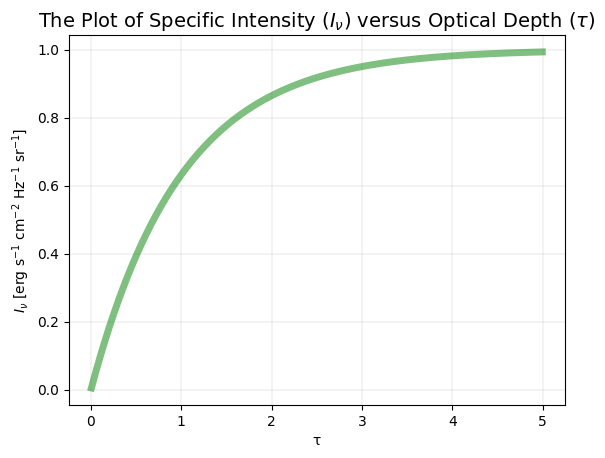

In [1]:
# This is a code that provides results to question 1 from AST3003S Assignemnt 1
# Valen Lebepe
# 14 August 2025

# importing Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt

# Defining variable
r = np.linspace (0, 5, 1000, endpoint=False) [1:] # Optical depth (0<r<5)

# Defining the Original function
def Iv(r):
    return np.array(1 - np.exp(-r))
    
# Plotting the function
plt.plot(r, Iv(r), 'g',linewidth = 5, alpha =0.5)
plt.xlabel('\u03C4', fontsize= 10)
plt.ylabel(r'$I_{\nu}$ [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$]')
plt.title(r'The Plot of Specific Intensity ($I_{\nu}$) versus Optical Depth ($\tau$)', fontsize=14)
plt.grid(True, linewidth = 0.2)
plt.savefig('plot 1a.png')
plt.show()


<body> 2.a</body>

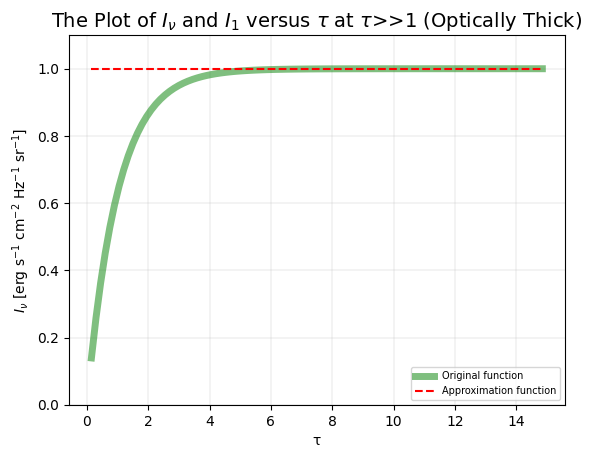

In [2]:
# Defining variable
r = np.linspace (0, 15, 100, endpoint=False) [1:] # Optical depth (0<r<15)

# Defining the function
def Iv(r):
    return 1 - np.exp(-r)

#Defining the Aproximation equation
def I(r):
    return np.ones(len(r))
    
# Plotting the function
plt.plot(r, Iv(r), 'g',label='Original function', linewidth = 5, alpha =0.5)
plt.plot(r,I(r), '--r', label='Approximation function')
plt.xlabel('\u03C4', fontsize= 10)
plt.ylabel(r'$I_{\nu}$ [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$]')
plt.ylim(0,1.1)
plt.title(r'The Plot of $I_{\nu}$ and $I_1$ versus $\tau$ at $\tau$>>1 (Optically Thick)', fontsize=14)
plt.grid(True, linewidth = 0.2)
plt.legend(fontsize=7, loc= 'lower right')
plt.savefig('plot 2a.png')
plt.show()


<body>2.b</body>

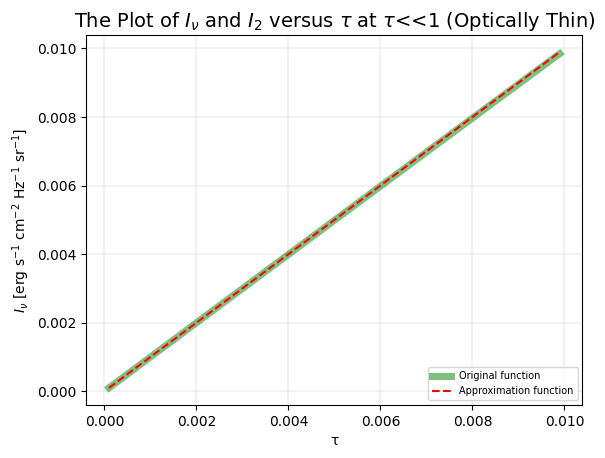

In [7]:
# Defining variable
r = np.linspace (0, 0.01 , 100, endpoint=False) [1:] # Optical depth (0<r<0.01)

# Defining the function
def Iv(r):
    return 1 - np.exp(-r)

#Defining the Aproximation equation
def I(r):
    return r
    
# Plotting the function
plt.plot(r, Iv(r), 'g',label='Original function', linewidth = 5, alpha =0.5)
plt.plot(r,I(r), '--r', label='Approximation function')
plt.xlabel('\u03C4', fontsize= 10)
plt.ylabel(r'$I_{\nu}$ [erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$]')
plt.title(r'The Plot of $I_{\nu}$ and $I_2$ versus $\tau$ at $\tau$<<1 (Optically Thin)', fontsize=14)
plt.grid(True, linewidth = 0.2)
plt.legend(fontsize = 7, loc= 'lower right')
plt.savefig('plot 3a.png')
plt.show()


<h1>Question 2</h1>

The contanst Gaunt Factor is: 4.890645674968533


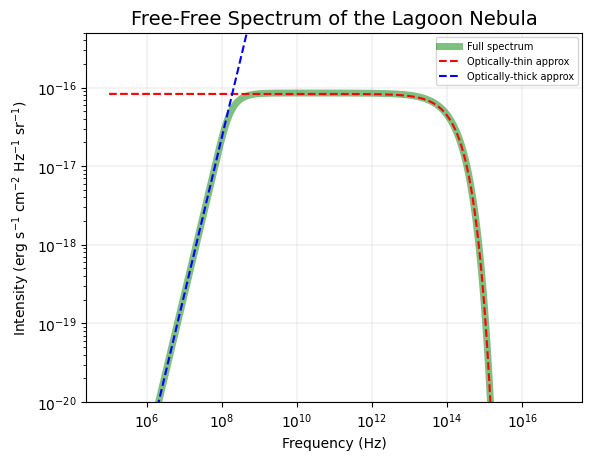

In [4]:
# Contants
ne= 80    # cm^-3
Z= 1
T= 7500    # K
h = 6.626e-27   # erg s
K = 1.3807e-16   # erg K^-1
d = 14*3.0857e18   # pc to cm
c = 3.0e10     # cm/s

# Frequency range 
f = np.logspace(5, 17, 50000)  # 10^5 GHz to 10^17 Hz

# Defining relevant functions
def g_ff1(f):   # Gaunt factor function
    return (11.962)*(T**0.15)*(f**(-0.1))
    
g_ff = (np.sum(g_ff1(f)))/(len(f))   # The constant Gaunt factor
print("The contanst Gaunt Factor is:",g_ff)
def j(f):  #emission conficient
    return (5.44e-39)*((Z^2)/(T))*(ne^2)*(g_ff)*np.exp((-h*f)/(K*T))

def B(f):    #Planck function
    return (2*h*(f**3)/(c**2))/(np.exp((h*f)/(K*T))-1)

def r(f):     #optical depth
    return (3.7e8)*(T**(-1/2))*(Z**2)*(f**(-3))*(1-np.exp((-h*f)/(K*T)))*(g_ff)*(ne**2)*(d)

def I(r):    # Full intensity
    return (B(f))*(1-np.exp(-r(f)))

# Plotting the full spectrum versus frequency
plt.title ("Free-Free Spectrum of the Lagoon Nebula", fontsize=14)
plt.loglog(f, I(r), 'g', label='Full spectrum', linewidth = 5, alpha =0.5)
plt.loglog(f, j(f)*2200*d, 'r--', label='Optically-thin approx')
f = np.logspace(5, 10, 50000)  # 10^5 GHz to 10^10 Hz
plt.loglog(f, B(f), 'b--', label='Optically-thick approx')
plt.ylim(1e-20, 5e-16)
plt.xlabel('Frequency (Hz)',fontsize=10)
plt.ylabel('Intensity (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ sr$^{-1}$)',fontsize=10)
plt.legend(fontsize=7, loc='upper right')
plt.grid(True, linewidth = 0.2)
plt.savefig('plot 4.png')
plt.show()

<h1>Question 5</h1>

<body>Computing the Radio Recombination Frequencies</body>

In [5]:
# Constants
c = 2.998e10      # cm/s
R_inf = 1.097e5   # cm^-1

#Defining the Rydberg formula for radio recombination lines
def rrl_frequency(n):
    return c * R_inf * ((1/n**2) - (1/((n+1)**2)))  # Exact formula

n_values = np.arange(50, 301)  # n = 50 to 300
frequencies = [rrl_frequency(n) / 1e9 for n in n_values]  # Convert to GHz

print("Hydrogen RRL Frequencies (Hnα, GHz):")
for n, nu in zip(n_values, frequencies):
    print(f"H{n}α: {nu:.4f} GHz")

Hydrogen RRL Frequencies (Hnα, GHz):
H50α: 51.0833 GHz
H51α: 48.1647 GHz
H52α: 45.4642 GHz
H53α: 42.9618 GHz
H54α: 40.6398 GHz
H55α: 38.4822 GHz
H56α: 36.4746 GHz
H57α: 34.6043 GHz
H58α: 32.8597 GHz
H59α: 31.2305 GHz
H60α: 29.7072 GHz
H61α: 28.2814 GHz
H62α: 26.9453 GHz
H63α: 25.6922 GHz
H64α: 24.5155 GHz
H65α: 23.4097 GHz
H66α: 22.3693 GHz
H67α: 21.3897 GHz
H68α: 20.4665 GHz
H69α: 19.5956 GHz
H70α: 18.7735 GHz
H71α: 17.9967 GHz
H72α: 17.2622 GHz
H73α: 16.5671 GHz
H74α: 15.9088 GHz
H75α: 15.2850 GHz
H76α: 14.6934 GHz
H77α: 14.1319 GHz
H78α: 13.5986 GHz
H79α: 13.0919 GHz
H80α: 12.6100 GHz
H81α: 12.1515 GHz
H82α: 11.7149 GHz
H83α: 11.2990 GHz
H84α: 10.9026 GHz
H85α: 10.5245 GHz
H86α: 10.1636 GHz
H87α: 9.8191 GHz
H88α: 9.4900 GHz
H89α: 9.1754 GHz
H90α: 8.8746 GHz
H91α: 8.5868 GHz
H92α: 8.3113 GHz
H93α: 8.0474 GHz
H94α: 7.7947 GHz
H95α: 7.5523 GHz
H96α: 7.3200 GHz
H97α: 7.0970 GHz
H98α: 6.8831 GHz
H99α: 6.6776 GHz
H100α: 6.4802 GHz
H101α: 6.2906 GHz
H102α: 6.1083 GHz
H103α: 5.9329 GHz
H104

<body>Computing the thermal line widths</body>

In [6]:
# Contants
k = 1.381e-16     # erg/K
T_e = 1e4         # K
m_H = 1.674e-24   # g

# defining the thermal width function
def thermal_line_width(nu):
    return (nu * 1e9) / c * np.sqrt(8 * k * T_e * np.log(2) / m_H)  # Hz

line_widths = [thermal_line_width(nu) / 1e3 for nu in frequencies]  # Convert to kHz

print("\nThermal Line Widths (∆ν, kHz):")
for n, dnu in zip(n_values, line_widths):
    print(f"H{n}α: {dnu:.2f} kHz")


Thermal Line Widths (∆ν, kHz):
H50α: 3644.39 kHz
H51α: 3436.16 kHz
H52α: 3243.50 kHz
H53α: 3064.98 kHz
H54α: 2899.33 kHz
H55α: 2745.40 kHz
H56α: 2602.17 kHz
H57α: 2468.74 kHz
H58α: 2344.28 kHz
H59α: 2228.04 kHz
H60α: 2119.37 kHz
H61α: 2017.65 kHz
H62α: 1922.33 kHz
H63α: 1832.93 kHz
H64α: 1748.99 kHz
H65α: 1670.09 kHz
H66α: 1595.87 kHz
H67α: 1525.98 kHz
H68α: 1460.12 kHz
H69α: 1397.99 kHz
H70α: 1339.34 kHz
H71α: 1283.92 kHz
H72α: 1231.52 kHz
H73α: 1181.93 kHz
H74α: 1134.97 kHz
H75α: 1090.46 kHz
H76α: 1048.25 kHz
H77α: 1008.19 kHz
H78α: 970.15 kHz
H79α: 934.00 kHz
H80α: 899.62 kHz
H81α: 866.91 kHz
H82α: 835.76 kHz
H83α: 806.09 kHz
H84α: 777.81 kHz
H85α: 750.84 kHz
H86α: 725.09 kHz
H87α: 700.52 kHz
H88α: 677.04 kHz
H89α: 654.59 kHz
H90α: 633.13 kHz
H91α: 612.60 kHz
H92α: 592.94 kHz
H93α: 574.12 kHz
H94α: 556.09 kHz
H95α: 538.80 kHz
H96α: 522.22 kHz
H97α: 506.32 kHz
H98α: 491.05 kHz
H99α: 476.39 kHz
H100α: 462.31 kHz
H101α: 448.78 kHz
H102α: 435.78 kHz
H103α: 423.27 kHz
H104α: 411.23 kHz
